<a href="https://colab.research.google.com/github/tugcegurbuz/DeepLearning_TF/blob/master/4_IntroductionToConvolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:** Introduction to Convolutions


1.   1D Convolution Operations
2.   2D Convolution Operations
3.   Convolution With TensorFlow
4.   Convolution Applied On A Image


---


In [0]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

#**1) Convolution: 1D Operation**

In [0]:
#Let's assume that im is our image and k is our kernel
k = [2, 1, 0]
im = [3, 4, 5]

#Do convolution operation
y = np.convolve(k, im)

y

array([ 6, 11, 14,  5,  0])

First we invert our filter.


So, what we did is to sliding window of k to over h.

<ul>
    <li>6  = 2 * 3 :            
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\ 
        \begin{bmatrix}
             2 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
    <li>11 = 1 * 3 + 2 * 4 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             1 & 2 & 0 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>14 = 0 * 3 + 1 * 4 + 2 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 1 & 2 \\
        \end{bmatrix}
        $ 
    </li>  
    <li>5  = 0 * 4 + 1 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 1 \\
        \end{bmatrix}
        $ 
    </li>
    <li>0  = 0 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\
        \end{bmatrix}
        \\
        \begin{bmatrix}
             0 & 0 & 0 \\
        \end{bmatrix}
        $ 
    </li>
</ul>

*Let's verify what Python did with manual calculations!*

Equation: 
$$y[n] = \sum\limits_{k\to-\infty}^\infty x[k] \cdot h[n-k] $$

Calculations:
$ 
y[0]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[0-k]= x[0]\cdot h[0]=3\cdot 2=6 \\
y[1]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[1-k]= x[0]\cdot h[1-0]+x[1]\cdot h[1-1] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[1] + x[1]\cdot h[0]= 3\cdot1+4\cdot 2=11 \\
y[2]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[2-k]= x[0]\cdot h[2-0]+x[1]\cdot h[2-1]+x[2]\cdot h[2-2]+ \space ... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[2] + x[1]\cdot h[1]+x[2]\cdot h[0]= 3\cdot0+4\cdot 1 +5\cdot 2=14 \\
y[3]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[3-k]= x[0]\cdot h[3-0]+x[1]\cdot h[3-1]+x[2]\cdot h[3-2]+ x[3]\cdot h[3-3] + \space... \\ 
\qquad\qquad\qquad\qquad\qquad   = x[0]\cdot h[3] +x[1]\cdot h[2] + x[2]\cdot h[1]+x[3]\cdot h[0]=0+0+5 \cdot 1 +0=5 \\
y[4]= \sum\limits_{k\to-\infty}^\infty x[k]\cdot h[4-k]= x[0]\cdot h[4-0]+x[1]\cdot h[4-1]+x[2]\cdot h[4-2]+\space... =0\\ 
$

There are three methods to apply kernel on the matrix, <b>with padding (full)</b>, <b>with padding(same)</b> and <b>without padding(valid)</b>:  

**a) With Padding (full):**

Given image(im) and kernel (k),

k[i] = [6,2]  
im[i] = [1,2,5,4]  

__Step 1__: 

[2  6]
 
   |  |
 
  V  V
 
 0 [1 2 5 4]
 
 = 2 * 0 + 6 * 1 = 6
 
 __Step 2__: Slide it to right

= 2 * 1 + 6 * 2 = 14

 __Step 3__: Slide it to right

= 2 * 2 + 6 * 5 = 34

 __Step 4__: Slide it to right

= 2 * 5 + 6 * 4 = 34

 __Step 5__: Slide it to right and beware that last component is 0.

= 2 * 4 + 6 * 0 = 8

So, the result is Y = [6, 14, 34, 34, 8]

In [0]:
#Let's verifty it with numpy!

k = [6, 2]
im = [1, 2, 5, 4]

y = np.convolve(k, im, "full") #full refers to with padding

In [0]:
#Because of with padding operation, final dimension is bigger
y

array([ 6, 14, 34, 34,  8])

**b) With Padding (Same)**

It is the same with previous one except it returns an output with the same length as maximum length of k or im.

So, we don't perform step 5 at full.

In [0]:
k = [6, 2]
im = [1, 2, 5, 4]

y = np.convolve(k, im, "same") 

y

array([ 6, 14, 34, 34])

**c) With No Padding (valid):**

Here, we apply the kernel when we had a compatible position on the image array, in some cases you want a dimensionality reduction. For this purpose, we simple ignore the steps that would need padding.

This method returns output of length $max(x, h) - min(x, h) + 1$, this is to ensure that values outside of the boundary of image will not be used in the calculation of the convolution

__Step 1__:

[2  6]  
 |  |  
 V  V  
[1  2  5  4]  

= 2 * 1 + 6 * 2 = 14

 __Step 2__: Slide it to right

= 2 * 2 + 6 * 5 = 34

 __Step 3__: Slide it to right

= 2 * 5 + 6 * 4 = 34


So, the result is Y = [14, 34, 34]

In [0]:
#Let's verifty it with numpy!
k = [6, 2]
im = [1, 2, 5, 4]

y = np.convolve(k, im, "valid")
y  

array([14, 34, 34])

#**2) Convolution: 2D Operation**

The 2D convolution operation is defined as:

<font size="4">$$ Im'= \sum\limits_{u,v} Im(x-u,y-v)k(u,v) $$ </font> 
 
 
Below we will apply the equation to an image represented by a 3x3 matrix according to the function k = (-1 1). 

*Please note that when we apply the kernel we always use its inversion.* 
 
$
Im=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

$
k=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
  
$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 248    & 4     \\
    -212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$
 
 
 Calculation continues like this.
 


For 2D convolution operations, we can also use Scipy library. Let's see outcomes of with zero padding and without zero padding techniques.

In [0]:
Im = [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

k = [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( Im, k, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding_same \n')
print(sg.convolve( Im, k, 'same'))

print('With zero padding_full \n')
print(sg.convolve( Im, k, 'full'))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding_same 

[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]]
With zero padding_full 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


Let's try a more difficult case when our function is 2x2 matrix.

Then, calculations will be like:

h= [ [-1  1] , [2   3] ]

$
\begin{bmatrix}
    \textbf{3}\ast \textbf{0}      & \textbf{2} \ast \textbf{0}     & 0      & 0     \\
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

In [0]:
Im = [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

k = [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( Im, k, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( Im, k, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( Im, k, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


#**3) Convolution: TensorFlow**

Suppose that you have two tensors:

* 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
* 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

The output size for zero padding 'SAME' mode will be:  
* the same as input = 10x10  

The output size without zero padding 'VALID' mode:  
* input size - kernel dimension + 1 = 10 -3 + 1 = 8 = 8x8 

In [0]:
#Building graph

im = tf.Variable(tf.random_normal([1, 10, 10, 1]))
k = tf.Variable(tf.random_normal([3, 3, 1, 1]))

#Operations
op = tf.nn.conv2d(im, k, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(im, k, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    print("Input \n")
    print('{0} \n'.format(im.eval()))
    print("Filter/Kernel \n")
    print('{0} \n'.format(k.eval()))
    
    print("Result/Feature Map with valid positions \n")
    result = sess.run(op)
    print(result)
    print('\n')
    
    print("Result/Feature Map with padding \n")
    result2 = sess.run(op2)
    print(result2)

Input 

[[[[ 0.32865784]
   [-2.3831832 ]
   [-0.36749935]
   [ 0.873006  ]
   [ 1.3585322 ]
   [ 0.33520448]
   [ 0.12121259]
   [-1.9554853 ]
   [ 0.25531772]
   [ 2.4323602 ]]

  [[ 0.27393565]
   [ 0.0690359 ]
   [ 1.6496091 ]
   [ 0.31915334]
   [ 0.88400906]
   [-0.26392826]
   [-0.18003187]
   [ 2.5881994 ]
   [ 0.5880423 ]
   [ 1.4102395 ]]

  [[ 0.931606  ]
   [ 0.01253017]
   [ 0.32030863]
   [ 0.15722707]
   [ 0.2235107 ]
   [ 0.1441911 ]
   [-1.040015  ]
   [ 0.6568212 ]
   [-1.1716776 ]
   [ 0.349635  ]]

  [[-0.13783187]
   [-0.8076475 ]
   [ 0.6009971 ]
   [ 0.46493304]
   [-0.6343826 ]
   [-0.49894622]
   [-0.22128423]
   [-0.5735044 ]
   [-1.0495373 ]
   [ 0.10235058]]

  [[-0.46323547]
   [ 1.4475312 ]
   [-0.14633945]
   [-0.46420276]
   [-1.3274016 ]
   [-1.6100011 ]
   [ 0.783225  ]
   [-0.10073337]
   [ 0.04644806]
   [ 2.1605241 ]]

  [[ 0.0621054 ]
   [-1.584678  ]
   [ 0.23336379]
   [ 0.22529353]
   [-0.29086506]
   [ 0.7411853 ]
   [-0.05051352]
   [-1.907556

##Convolution Applied On Example Image

In [0]:
#Upload the image you want
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

Saving arash.png to arash.png


In [0]:
#Check whether the image is in  your directory
!ls

 arash.jpg   bird.jpg					  sample_data
 arash.png  'open?id=1hE1QCeRY7vuvT0618yX4VqG_bDeQyd2W'



 Original type: <PIL.Image.Image image mode=L size=481x482 at 0x7FF39BD385F8> 


After conversion to numerical representation: 

 array([[255, 255, 255, ..., 252, 252, 252],
       [255, 174, 174, ..., 172, 172, 252],
       [255, 174, 174, ..., 172, 172, 252],
       ...,
       [255, 172, 173, ...,  16,  14, 255],
       [255, 172, 173, ...,  16,  14, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

 Input image converted to gray scale: 



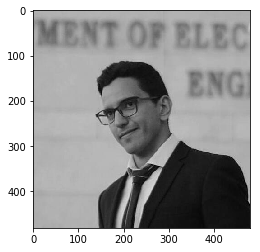

In [61]:
#Open the image
im = Image.open('arash.png')

#Convert image into black and white.
# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)

image_gr = im.convert("L")
                              
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 

#Activating matplotlib for Ipython
%matplotlib inline

# Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


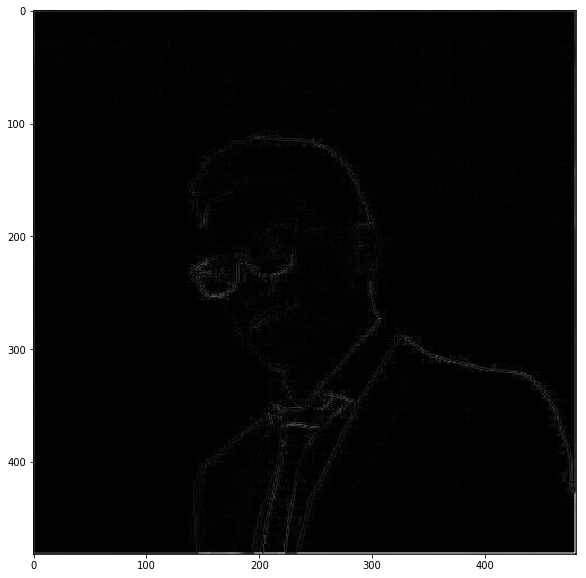

In [64]:
#Let's apply edge detector kernel
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

If we change the kernel and start to analyze the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps.

<b>Please note that when you are dealing with most of the real applications of CNNs, you usually convert the pixels values to a range from 0 to 1. This process is called normalization.</b>

GRADIENT MAGNITUDE - Feature map


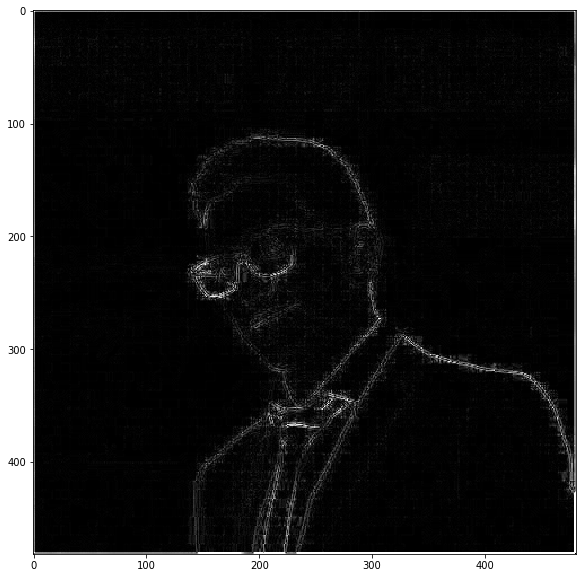

In [65]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

Let's try it with a digit, instead of my boyfriend's image!

In [0]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7FF39BD680B8> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



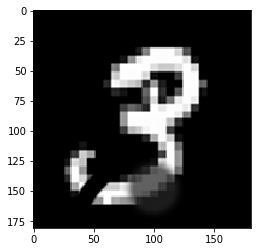

In [56]:
#Open the image
im1 = Image.open('num3.jpg')

#Convert the image black and white
image_gr1 = im1.convert('L')

print("\n Original type: %r \n\n" % image_gr1)

#Convert image to a matrix with values from 0 to 255 (uint8) 
arr1 = np.asarray(image_gr1) 
print("After conversion to numerical representation: \n\n %r" % arr1)

#Activating matplotlib for Ipython
%matplotlib inline

#Plot the image
imgplot1 = plt.imshow(arr1)
imgplot1.set_cmap('gray')
print("\n Input image converted to gray scale: \n")
plt.show(imgplot1)

GRADIENT MAGNITUDE - Feature map


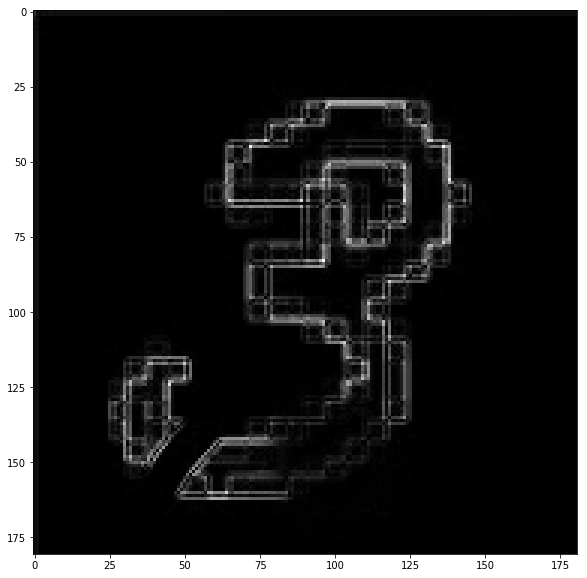

In [68]:
#Let's apply edge detector kernel
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad1 = signal.convolve2d(arr1, kernel, mode='same', boundary='symm')


print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

GRADIENT MAGNITUDE - Feature map


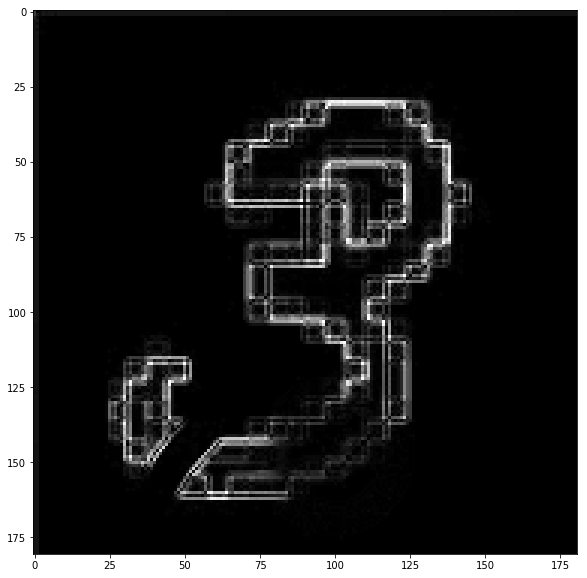

In [69]:
#Normalization
type(grad1)

grad_biases1 = np.absolute(grad1) + 100

grad_biases1[grad_biases1 > 255] = 255

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases1), cmap='gray')